In [1]:
# Packages
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import datetime
import time
#from All_data_muduo import df,f1
#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns',20 )

Look at Sparse PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html

install plaidml: https://towardsdatascience.com/plaidml-deep-learning-on-a-budget-ce22b58ba8c2

LTSM Code: https://medium.com/analytics-vidhya/beginners-guide-to-stock-prediction-using-lstm-7010bf8b8c21

Neural Networks for Regression: https://vitalflux.com/keras-neural-network-for-regression-problem/

Regression Metrics: https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
https://heartbeat.fritz.ai/linear-regression-using-keras-and-python-7cee2819a60c


In [2]:
training_filepath = "./ignore_folder/tsvd_model_ready_60min.csv.zip"
stock_filepath =  "./ignore_folder/processed_reddit_v4_60min.pkl.zip"
offset_target = 1

start_time = time.time()
print(f"Reading Stocks: {stock_filepath}")
stock_df = pd.read_pickle(stock_filepath)

print(f"Building Time Series")
#//*** Peel off Time. Used for graphing
time_series = stock_df['time']

print(f"Cleaning Columns...")
#//*** Remove uneeded columns
for col in ['time','open','high','low','body']:
    if col in stock_df.columns:
        del stock_df[col]

print("Building Target Offset Columns...")
#//*** Build the target variables and intervals of stock prices. This is a single value determined by target)offset

#//*** create a list of nan values of x length
nan_list = list(np.empty( offset_target )* np.nan )

#//*** Create target variable Price which is stocks + x columns in advance
#//*** Takes the closing price starting at x and gets the remainder, this generates the offset
#//*** nan_list fills the missing x values with nans
target = list(stock_df['close'][offset_target:]) + nan_list 

print(f"Check Stock Columns are aligned with offset and time")
#//*** Temporarily merge stock_df, time_series, and target series. 
#//*** Make sure everything is aligning correctly.
temp_df = pd.concat([pd.DataFrame(time_series),pd.DataFrame(target),stock_df],axis=1)
print(temp_df.head(10))
print(temp_df.tail(10))

print(f"Building Combined df for training")
df = pd.concat([stock_df,pd.read_csv(training_filepath)],axis=1)

#//*** Delete unused variables to free up memory
try:
    
    del temp_df
    del stock_df
except:
    print()
print (f"Data is training ready: {round(time.time()-start_time,2)}s")

df

Reading Stocks: ./ignore_folder/processed_reddit_v4_60min.pkl.zip
Building Time Series
Cleaning Columns...
Building Target Offset Columns...
Check Stock Columns are aligned with offset and time
                 time          0      close  volume  comment_count
0 2019-07-29 08:00:00  10.723092  10.866067    2492             40
1 2019-07-29 09:00:00  10.429136  10.723092    2200              0
2 2019-07-29 10:00:00  10.694497  10.429136  564758              0
3 2019-07-29 11:00:00  10.646839  10.694497  247215              0
4 2019-07-29 12:00:00  10.765984  10.646839  284815              0
5 2019-07-29 13:00:00  10.823174  10.765984  342316              0
6 2019-07-29 14:00:00  10.842238  10.823174  195521              0
7 2019-07-29 15:00:00  10.913725  10.842238  288475              0
8 2019-07-29 16:00:00  10.866067  10.913725  626783              0
9 2019-07-29 17:00:00  10.723092  10.866067   70681              0
                    time        0    close    volume  comment_count
6

,close,volume,comment_count,0,1,2,3,4,5,6,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,10.866067,2492,40,0.402554,3.667265e-02,-2.067388e-02,-2.935053e-02,1.982483e-02,1.842293e-02,-9.105670e-03,...,1.574640e-03,-2.147553e-03,4.804881e-04,2.813393e-03,-3.546013e-03,1.252978e-03,-1.564411e-04,1.881156e-03,-4.390987e-03,-5.182442e-03
1,10.723092,2200,0,-0.000000,-1.178638e-15,-1.039611e-15,5.405201e-15,1.390234e-15,1.561614e-16,-4.274973e-16,...,-3.079595e-17,1.628646e-17,-1.571956e-17,4.342565e-17,6.247059e-17,-2.513909e-17,-1.315520e-16,2.794204e-17,-1.039378e-16,-1.010178e-16
2,10.429136,564758,0,-0.000000,2.946596e-16,1.039611e-15,-5.520206e-15,-4.826472e-15,6.662885e-15,-1.502018e-16,...,-5.925873e-18,-1.092926e-17,1.265805e-18,-1.618276e-17,1.421481e-17,2.127558e-17,1.404775e-17,5.760139e-17,8.927591e-17,-1.173689e-17
3,10.694497,247215,0,-0.000000,0.000000e+00,-1.039611e-15,-6.900257e-16,-4.196932e-16,4.164303e-16,9.243185e-16,...,-4.046486e-17,3.184681e-17,-2.300131e-17,-9.893506e-19,-8.640583e-17,-9.705423e-17,6.885715e-17,-7.177323e-17,-2.408713e-17,-1.573830e-17
4,10.646839,284815,0,-0.000000,3.683245e-17,-2.599027e-16,-4.600171e-16,3.987086e-15,3.747873e-15,-3.697274e-16,...,-1.205619e-17,4.797358e-17,6.272779e-17,-6.131245e-17,-7.046714e-17,5.976357e-17,-6.062463e-17,1.142832e-16,-4.544415e-17,1.093623e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6863,35.329100,16629161,0,-0.000000,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,...,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6864,35.991100,19774603,0,-0.000000,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,...,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6865,39.170000,4218169,0,-0.000000,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,...,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6866,38.750000,3911023,0,-0.000000,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,...,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras.models import Sequential

#//*** Verify Plaid ML is working
import plaidml.keras

import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

plaidml.keras.install_backend()


import tensorflow.keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import tensorflow.keras.backend as K

K

<module 'tensorflow.keras.backend' from 'C:\\Users\\family\\anaconda3\\envs\\plaidml\\lib\\site-packages\\tensorflow\\keras\\backend\\__init__.py'>

In [85]:


#
# Set up the network
#



In [8]:
optimizer = optimizers.RMSprop(0.0099)
#create and fit the Regression network
def model_regr(dim_size,lrn_rate = 0.01, mntum = 0 ):
    #Intializing the RNN
    model = Sequential()
    #1st layer
    model.add(layers.Dense(500, activation='relu', input_shape=(dim_size,)))
    #network.add(layers.Dense(32, activation='relu'))
    #network.add(layers.Dense(1))
    #model.add(Dropout(0.2))
    #2nd layer
    model.add(layers.Dense(500, activation='relu'))
    #network.add(layers.Dense(dim_size, activation='relu'))
    #network.add(layers.Dense(dim_size, activation='relu'))
    #network.add(layers.Dense(dim_size/4, activation='relu'))
    #network.add(layers.Dense(dim_size/8, activation='relu'))
    #model.add(Dropout(0.2))
    #Adding the output layer
    model.add(layers.Dense(1))
    #model.compile(loss = 'mse', optimizer='adam', metrics=['mse','mae','mape'])
    #model.compile(loss = 'mse', optimizer='RMSprop', metrics=['mse','mae','mape'])
    model.compile(loss = 'mse', optimizer='adam', metrics=['mse','mae','mape'])
    return model

X,y = np.array(df), np.array(target)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33, shuffle=False)
#x_train =     np.array(df[:2000])
#y_train = np.array(target[:2000])
#x_test =     np.array(df[2001:-1])
#y_test = np.array(target[2001:-1])

start_time = time.time()
print(x_train.shape[1])
regr = model_regr(x_train.shape[1],lrn_rate=0.01, mntum=0)
history = regr.fit(x_train, y_train, batch_size=1, verbose=1, epochs=20)
print(f"Run time internal GPU: {time.time()-start_time}")
result = regr.predict(x_test)
display_size = 40

fig,ax = plt.subplots()

ax.plot(range(len(y_test)),y_test )
ax.scatter(range(len(result)),result,color='red' )


    #plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.show()

print(history.history.keys())

for x in history.history.keys():
    plt.plot(history.history[x],label=x)
#plt.plot(history.history['val_loss'])
    plt.title(x)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()

6003
Epoch 1/20
4601/4601 [==============================] - 63s 13ms/step - loss: 1710918101.5137 - mse: 1710918101.5137 - mae: 6148.2210 - mape: 178966.9263
Epoch 2/20
4601/4601 [==============================] - 65s 14ms/step - loss: 671922.3696 - mse: 671922.3696 - mae: 91.7646 - mape: 2132.8376
Epoch 3/20
2928/4601 [==================>...........] - ETA: 31s - loss: 6.3959 - mse: 6.3959 - mae: 2.0925 - mape: 42.1674

KeyboardInterrupt: 

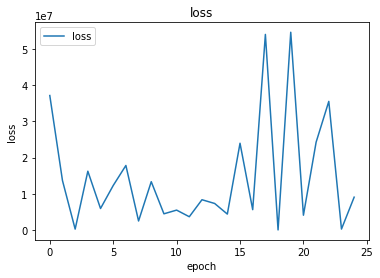

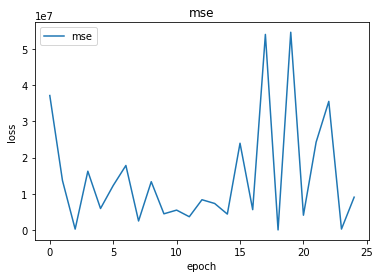

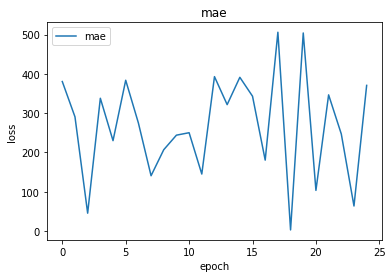

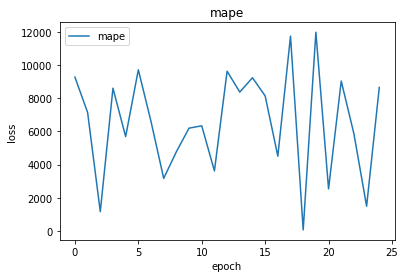

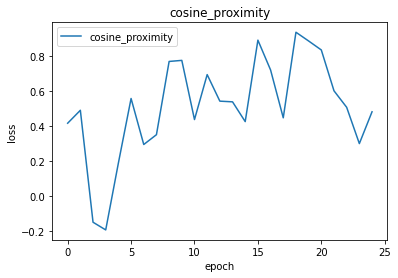

In [80]:
for x in history.history.keys():
    plt.plot(history.history[x],label=x)
#plt.plot(history.history['val_loss'])
    plt.title(x)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()

In [37]:
result = regr.predict(x_test)

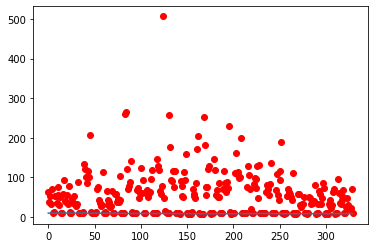

In [38]:
display_size = 40

fig,ax = plt.subplots()

ax.plot(range(len(y_test)),y_test )
ax.scatter(range(len(result)),result,color='red' )


    #plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.show()

In [20]:
import time
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [ ]:

x_train = df[:1000]
y_train = target[:1000]
x_test = df[1001:1100]
y_test = target[1001:1100]
plot_x = time_series[1001:1100]
start_time = time.time()
print("Regressing")
regr = MLPRegressor(max_iter=500).fit(x_train,y_train)
#scores = cross_val_score(regr, x_train, y_train, cv=5)
print(f"Complete: {round(time.time()-start_time,2)}" )
#//*** Score the model
score = regr.score(x_train, y_train)
result = regr.predict(x_test)

mse = mean_squared_error(y_test, result)

#//*** Root Mean squared Error
rmse = sqrt(mse)
print(score)
print(rmse)
#print(result)

display_size = 40

fig,ax = plt.subplots()

ax.plot(plot_x,y_test )
ax.scatter(plot_x,result,color='red' )


    #plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.show()


In [ ]:
# %%
import pandas as pd

#df = pd.read_csv("~/Documents/GitHub/Project/ignore_folder/1min_ml_1000_pca",compression="zip")

#%%
X,y = df[:1000], target[:1000]

start_time = time.time()
print("Regressing")
# %%
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

regr = MLPRegressor(hidden_layer_sizes = 5000, max_iter=50000)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, shuffle=False)

regr.fit(X_train, y_train)

#%%
regr.score(X_test, y_test)

#%%
#regr.c
# %%
#score = cross_val_score(regr, X,y,n_jobs=-1,cv=3)
# %%
regr_predict = regr.predict(X_test)

print(f"Complete: {round(time.time()-start_time,2)}" )
# %%
import numpy as np
err2= np.sqrt(abs((np.square(regr_predict) - np.square(y_test.values)))).sum()
mean_err = err2/len(y_test)
rmse = np.sqrt(mean_err)

##%%
#import matplotlib.pyplot as plt
#plt.plot(range(len(regr_predict[0:200])), regr_predict[0:200])
#plt.plot(range(len(y_test[0:200])), y_test[0:200])

# plot(x= range(len(y_test)), y=y_test)
# %%


Regressing


In [ ]:
#score = cross_val_score(regr, X,y,n_jobs=-1,cv=3)
# %%
regr_predict = regr.predict(X_test)

#print(f"Complete: {round(time.time()-start_time,2)}" )
# %%
import numpy as np
err2= np.sqrt(abs((np.square(regr_predict) - np.square(y_test.values)))).sum()
mean_err = err2/len(y_test)
rmse = np.sqrt(mean_err)


NameError: name 'regr_predict' is not defined

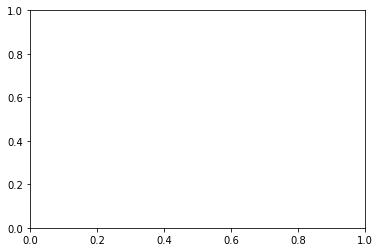

In [28]:
display_size = 40

fig,ax = plt.subplots()

ax.plot(range(len(regr_predict)),y_test )
ax.scatter(range(len(regr_predict)),regr_predict,color='red' )


    #plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.show()

In [ ]:
import time
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

#//*** Define the Prediction (Target) Column
predict_col = 'close_5'

#//*** Build a list of the PCA Columns
pca_cols = list(df.columns[17:])
stock_cols = ['close','volume']
train_cols = stock_cols + pca_cols




In [ ]:
display_size = 40

fig,ax = plt.subplots()
plot_x = np.arange(len(y_test))
ax.plot(plot_x,y_test )
ax.scatter(plot_x,result,color='red' )


    #plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.show()

In [ ]:
results_df = pd.DataFrame(columns=['target','rmse','r2','start','end','predict_range','model_time','actual','predict'])

Notes on Normalization: https://stackoverflow.com/questions/62131266/mlpregressor-working-but-results-dont-make-any-sense

In [ ]:
#//*** Pick start and end iLoc for training
predictions_in_advance = 5000
training_range = 5000

#//*** Loop through each of the target variables
for tgt_col in df.columns[7:17]:
    
    #//*** Model progressive slices of the data
    for x in range(10,60):
        
        #//*** Training start is counter * the training range
        train_start = x * training_range

        #//*** End Training at start + range
        train_end   = train_start + training_range
        
        #//*** Target Column
        predict_col = tgt_col

        #//*** Build Training set from start iloc to end iloc
        x_train = df[train_cols][train_start:train_end]
        y_train = df[predict_col][train_start:train_end]

        #//*** Build Test set from Training End + predictions_in_advace
        x_test = df[train_cols][train_end:train_end + predictions_in_advance]
        y_test = df[predict_col][train_end:train_end + predictions_in_advance]

        #//*** Scale the training data
        scaler = MinMaxScaler()
        x_train_norm = scaler.fit_transform(x_train)
        x_test_norm = scaler.fit_transform(x_test)

        start_time = time.time()
        print("Regressing")
        
        #//*** Fit the regressor
        regr = MLPRegressor(max_iter=5000).fit(x_train_norm,y_train)

        #score = regr.score(x_train, y_train)
        
        #//*** Generate Predictions
        result = regr.predict(x_test_norm)

        #//*** Mean Squared error
        mse = mean_squared_error(y_test, result)

        #//*** These are values to be added to results_df
        target = predict_col
        
        #//*** Root Mean squared Error
        rmse = sqrt(mse)
        #//*** r2 score for model evaluation
        r2 = r2_score(y_test,result)
        start = train_start
        end = train_end
        predict_range = training_range
        model_time = round(time.time()-start_time,2)
        print(f"Complete: {model_time}s" )
        actual = y_test
        predict = result

        #//*** Update Results_df
        results_df.loc[len(results_df)] = [target,rmse,r2,start,end,predict_range,model_time,actual,predict]

        #//*** PLot Results
        fig,ax = plt.subplots()
        plot_x = np.arange(len(y_test))
        ax.plot(plot_x,y_test )
        ax.scatter(plot_x,result,color='red' )

        title= ""
        title+=f"Training Range: {train_start} - {train_end}\n"
        title+=f"Prediction Range: {train_end} - {train_end + predictions_in_advance}\n"
        title+=f"Target: {predict_col} rmse:[{round(rmse,4)}] [Model score: ({round(score,4)})]\nr2: ({r2})"
        plt.title(title)    
        plt.show()
results_df

In [ ]:
results_df.to_pickle('./results/results_amc_1min_MLPRegressor_v1.pkl.zip')